# Unit 1: The Modeler

## Learning Outcomes

* Recognising situations where relationships between variables are non-linear.
* Explaining why quadratic models are suitable for representing curved real-world data.
* Applying quadratic equations to model real datasets and generate predictions.
* Analysing the fit of a quadratic model by comparing observed data with the model output.

<iframe width="560" height="315" src="https://www.youtube.com/embed/Hl5JZEh3wUA?si=NisuFmBHg42XJ-5w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Introduction

Before this year, you worked mainly with straight lines. You learned that when one quantity increases at a constant rate with respect to another, the relationship can be represented by a straight line. Many real situations behave like this, but not all.

In nature and science, some relationships change more rapidly as time passes. A ball thrown into the air rises, slows down, stops, and then falls. The shape traced by its height over time is not a straight line. It is a curve.

In this unit, you will learn how to recognise such curved patterns and model them using a quadratic equation. You will move from describing data to creating a mathematical model that explains it. This is the role of a modeler.

> **Special Note**
> Indian mathematicians were among the earliest to study quadratic equations systematically.
Aryabhata (5th century CE), in his work Aryabhatiya, described methods for solving quadratic equations, showing how numerical relationships could model real quantities such as time and distance.


## Activity 1.1: Exploring a Non-Linear Relationship
We will begin with a simple dataset related to motion. Imagine a ball thrown vertically upwards. At different moments in time, its height is measured. The values below are simplified but realistic.

In [1]:
import pandas as pd

data = {
    "Time": [0, 1, 2, 3, 4, 5],
    "Height": [0, 8, 14, 18, 14, 8]
}

df = pd.DataFrame(data)
df

,Time,Height
0,0,0
1,1,8
2,2,14
3,3,18
4,4,14
5,5,8


Look at the table carefully. As time increases, the height first increases, then decreases. This already suggests that the relationship is not linear.

## Activity 1.2: Visualising the Pattern with a Scatter Plot

Before choosing a mathematical model, it is always useful to look at the data visually.

> **Learning Note**
> A scatter plot shows each pair of values as a dot.
It is especially useful when we want to study how one quantity changes with another.
Here, each measurement of time and height is a separate observation, so a scatter plot is the right choice.

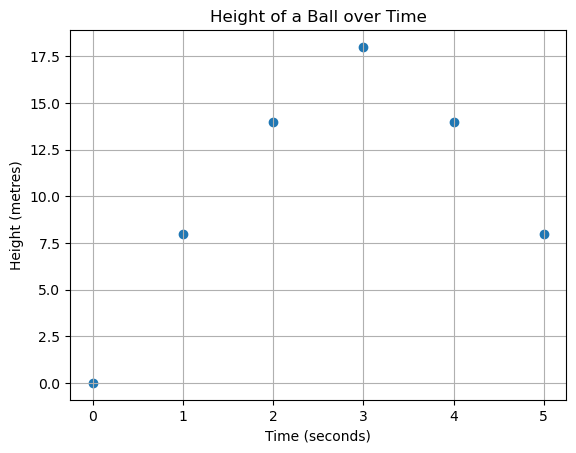

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df["Time"], df["Height"])
plt.xlabel("Time (seconds)")
plt.ylabel("Height (metres)")
plt.title("Height of a Ball over Time")
plt.grid(True)
plt.show()


The points form a curved shape rather than a straight line. This tells us that a linear model is not suitable here.

## Activity 1.3: Trying a Linear Model and Observing Its Limitation

Even though the data looks curved, let us first try fitting a straight line. This helps us understand why a different model is needed.

In [17]:
import numpy as np

x = df["Time"]
y = df["Height"]

m, c = np.polyfit(x, y, 1)
m, c

(1.7714285714285716, 5.904761904761904)

Now plot this line together with the data points.

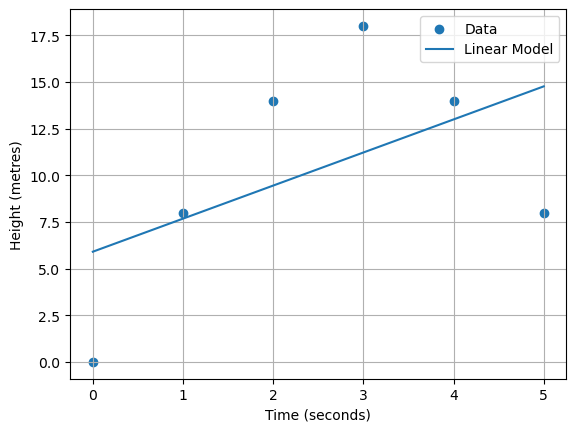

In [6]:
plt.scatter(x, y, label="Data")
plt.plot(x, m * x + c, label="Linear Model")
plt.xlabel("Time (seconds)")
plt.ylabel("Height (metres)")
plt.legend()
plt.grid(True)
plt.show()

You will notice that the straight line does not pass close to all the points. It cannot capture the rise and fall of the height properly. This confirms that a linear model is not appropriate.

## Activity 1.4: Modelling the Data Using a Quadratic Equation

A curved pattern like this is often described well by a quadratic equation of the form:

$$y = ax^2 + bx + c$$

This type of equation is called a second-degree polynomial.

> **Learning Note**
> When data shows a rise followed by a fall, or a fall followed by a rise, a quadratic model is often suitable.
The squared term allows the graph to bend, which a straight line cannot do.

Let us now fit a quadratic model to the same data.

In [18]:
a, b, c = np.polyfit(x, y, 2)
a, b, c

(-1.9642857142857109, 11.592857142857131, -0.642857142857124)

Now plot the quadratic curve along with the data points.

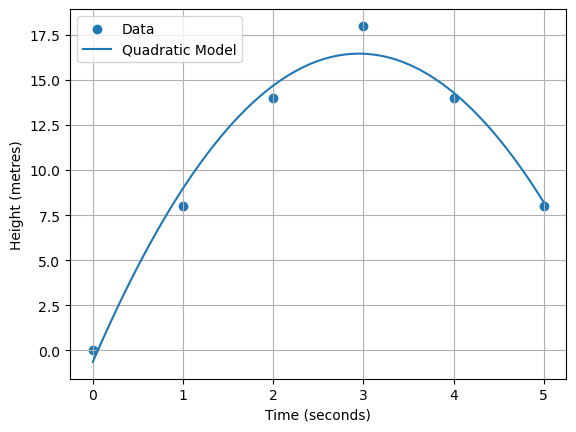

In [8]:
x_smooth = np.linspace(x.min(), x.max(), 100)
y_quad = a * x_smooth**2 + b * x_smooth + c

plt.scatter(x, y, label="Data")
plt.plot(x_smooth, y_quad, label="Quadratic Model")
plt.xlabel("Time (seconds)")
plt.ylabel("Height (metres)")
plt.legend()
plt.grid(True)
plt.show()

The curve now follows the data much more closely. This shows that the quadratic model is a better description of the situation.

## Activity 1.5: Interpreting the Quadratic Model

The quadratic equation you found represents the motion of the ball. Each part of the equation has meaning.

* The squared term controls the curvature of the graph
* The linear term affects how fast the height initially changes
* The constant term gives the height at time zero

You do not need to memorise these meanings now. The important idea is that the model summarises the behaviour of the data in a single mathematical expression.

You can also use the model to estimate the height at a time that is not in the table. For example, what might be the height at 2.5 seconds?

In [11]:
time_new = 2.5
height_predicted = a * time_new**2 + b * time_new + c
height_predicted


16.062500000000007

This value is a prediction based on the model.

## Practice Tasks with solutions

Try the following tasks to strengthen your understanding.

1. Change one height value slightly and fit the quadratic model again. Observe how the curve changes.


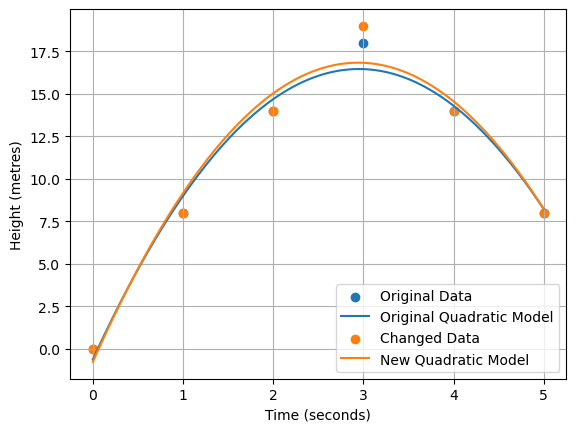

(-2.035714285714283, 11.97857142857142, -0.7857142857142655)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Make a copy so the original data stays safe
df_changed = df.copy()

# Change one value slightly (for example, change height at time = 3)
df_changed.loc[df_changed["Time"] == 3, "Height"] = 19

x2 = df_changed["Time"]
y2 = df_changed["Height"]

a2, b2, c2 = np.polyfit(x2, y2, 2)

x_smooth2 = np.linspace(x2.min(), x2.max(), 100)
y_quad2 = a2 * x_smooth2**2 + b2 * x_smooth2 + c2

plt.scatter(x, y, label="Original Data")
plt.plot(x_smooth, y_quad, label="Original Quadratic Model")

plt.scatter(x2, y2, label="Changed Data")
plt.plot(x_smooth2, y_quad2, label="New Quadratic Model")

plt.xlabel("Time (seconds)")
plt.ylabel("Height (metres)")
plt.legend()
plt.grid(True)
plt.show()

a2, b2, c2


You should see the new curve shift slightly to match the changed point.

2. Use the quadratic model to predict the height at 1.5 seconds.


In [13]:
time_new = 1.5
height_predicted = a * time_new**2 + b * time_new + c
height_predicted


12.326785714285723

3. Plot only the quadratic curve without the scatter points. What does the curve represent on its own?

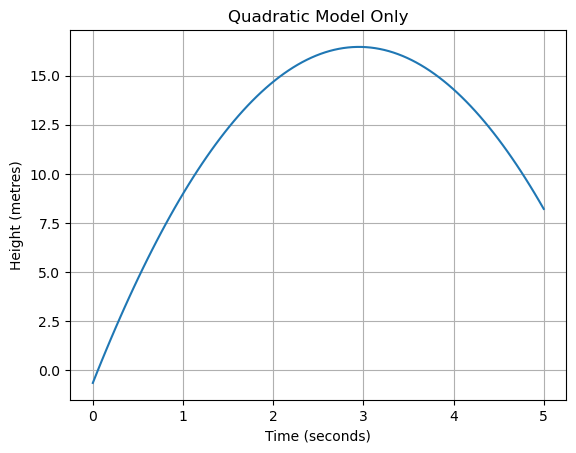

In [14]:
plt.plot(x_smooth, y_quad)
plt.xlabel("Time (seconds)")
plt.ylabel("Height (metres)")
plt.title("Quadratic Model Only")
plt.grid(True)
plt.show()

This curve represents the model’s prediction of height for any time value in the range, even where you did not measure data.

4. Compare the predictions from the linear model and the quadratic model at time 3 seconds. Which one seems more reasonable?

In [19]:
time_check = 3

linear_prediction = m * time_check + c
quadratic_prediction = a * time_check**2 + b * time_check + c

linear_prediction, quadratic_prediction


(4.671428571428591, 16.457142857142873)

To see how close each is to the actual value in the dataset:

In [16]:
actual_at_3 = df.loc[df["Time"] == 3, "Height"].values[0]
actual_at_3

18

Usually, the quadratic prediction will be closer because the data has a curved pattern.

## Reflection (Optional)

In this unit, you moved from observing data to creating a mathematical model. You saw that not all relationships are linear and that curved patterns often need quadratic equations.

Reflect on the following questions:

* How did the scatter plot help you decide which model to use
* Why was the linear model not suitable for this data
* How did the quadratic model improve the fit
* What does it mean to use a model to make a prediction
* Where in real life might you see similar curved patterns